# Project Overview

To understand the influence of the parents background, test preparation etc on students performance

# Dataset

from Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

# Data Inspection

In [26]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [61]:
# read the data 
data=pd.read_csv("StudentsPerformance.csv")
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [28]:
# shape of the data
data.shape

(1000, 8)

data has 8 columns & 1000 rows

In [29]:
# check the null & dtype of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


1. data is have non-null values, but there 'none' values

2. data have both categorical & numerical features

In [30]:
# statistic summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


1. by comparing mean & 50% percentile value , we can conclude that there are some outliers present in this dataset.that outlier value pulls our means to down

2. mean & std deviation of all the numerical columns are of same range, mean between 66.0-69.1 and std deviation between 14.6-15.1

3. there is minimum value of zero in math score, for writing minimum score is 10 and readilng minimum score much higher 17

In [31]:
# check missing values
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

data is have non-null values, but there 'none' values present in the dataset

In [32]:
# check duplicate values
data.duplicated().sum()

0

no duplicate values present in the dataset

In [33]:
# check no of unique values in each column
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
# check various categories present in the categorical column

cat_col=data.select_dtypes('object').columns
for col in cat_col:
    print("Categorical values in ",col,":",data[col].unique())

Categorical values in  gender : ['female' 'male']
Categorical values in  race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical values in  parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical values in  lunch : ['standard' 'free/reduced']
Categorical values in  test preparation course : ['none' 'completed']


In [35]:
# remove space and '/' in column name by underscore

data.columns = data.columns.str.replace(' ', '_').str.replace('/', '_')
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

now spaces & '/' has been replaced from the column name 

In [36]:
# divide the data into numerical & categorical features

numerical_feat=data.select_dtypes(exclude='object').columns
categorical_feat=data.select_dtypes(include='object').columns

print("We have {} numerical features {}".format(len(numerical_feat),numerical_feat.values))
print("We have {} categorical features {}".format(len(categorical_feat),categorical_feat.values))

We have 3 numerical features ['math_score' 'reading_score' 'writing_score']
We have 5 categorical features ['gender' 'race_ethnicity' 'parental_level_of_education' 'lunch'
 'test_preparation_course']


# Data Pre-Processing

# Feature Engineering

In [37]:
# create new columns for Total score & averagre score

data['Total_Score']=data['math_score']+data['reading_score']+data['writing_score']
data['Avg_Score']=data['Total_Score']/3

In [38]:
# check for those who got full marks for each category
math=data[data['math_score']==100]['gender'].count()
reading=data[data['reading_score']==100]['gender'].count()
writing=data[data['writing_score']==100]['gender'].count()

print("{} students got full marks in Maths".format(math))
print("{} students got full marks in reading".format(reading))
print("{} students got full marks in writing".format(writing))

7 students got full marks in Maths
17 students got full marks in reading
14 students got full marks in writing


In [39]:
# check for those who scored less than 20 in each category

math=data[data['math_score']<20]['gender'].count()
reading=data[data['reading_score']<20]['gender'].count()
writing=data[data['writing_score']<20]['gender'].count()

print("{} students got less than 20 marks in Maths".format(math))
print("{} students got less than 20 marks in reading".format(reading))
print("{} students got less than 20 marks in writing".format(writing))

4 students got less than 20 marks in Maths
1 students got less than 20 marks in reading
3 students got less than 20 marks in writing


### Histogram & KDE Plot

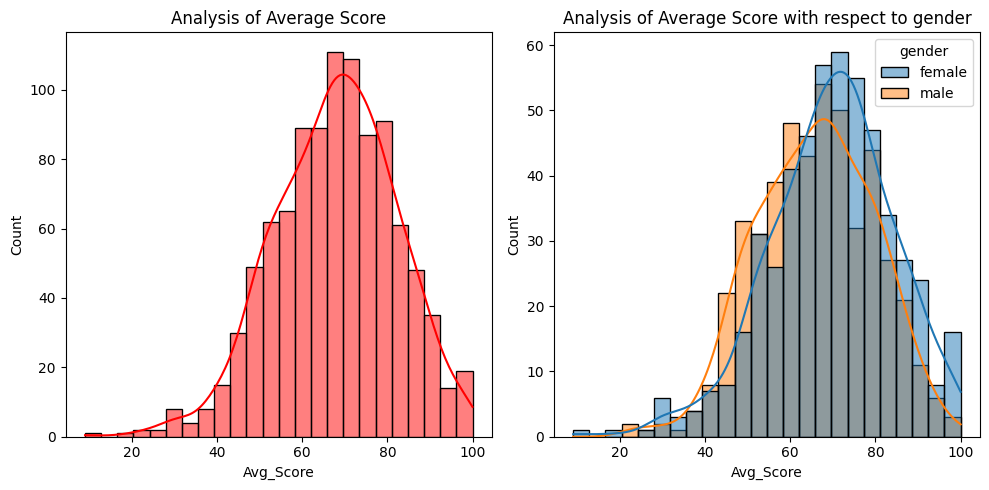

In [40]:
# plot histogram using seaborn library


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='Avg_Score',data=data,kde=True,color='r')
plt.title('Analysis of Average Score')
plt.subplot(1,2,2)
sns.histplot(x='Avg_Score',data=data,kde=True,hue='gender')
plt.title('Analysis of Average Score with respect to gender')
plt.tight_layout()

Insight: 
    
    1. females are better performing compared to male students
    
    

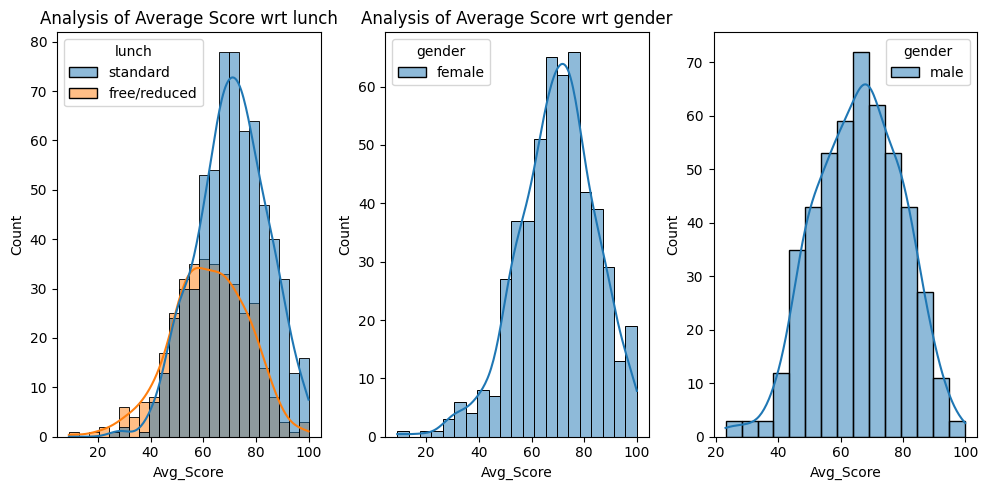

In [41]:
# average with respect lunch & gender

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(x='Avg_Score',data=data,kde=True,color='r',hue='lunch')
plt.title('Analysis of Average Score wrt lunch')
plt.subplot(1,3,2)
sns.histplot(x='Avg_Score',data=data[data['gender']=='female'],kde=True,hue='gender')
plt.title('Analysis of Average Score wrt gender')
plt.subplot(1,3,3)
sns.histplot(x='Avg_Score',data=data[data['gender']=='male'],kde=True,hue='gender')
plt.tight_layout()

Insight:
    
    1. Average score is found better for students having stardard lunch
    
    2. Average score value is more for female compared to male students

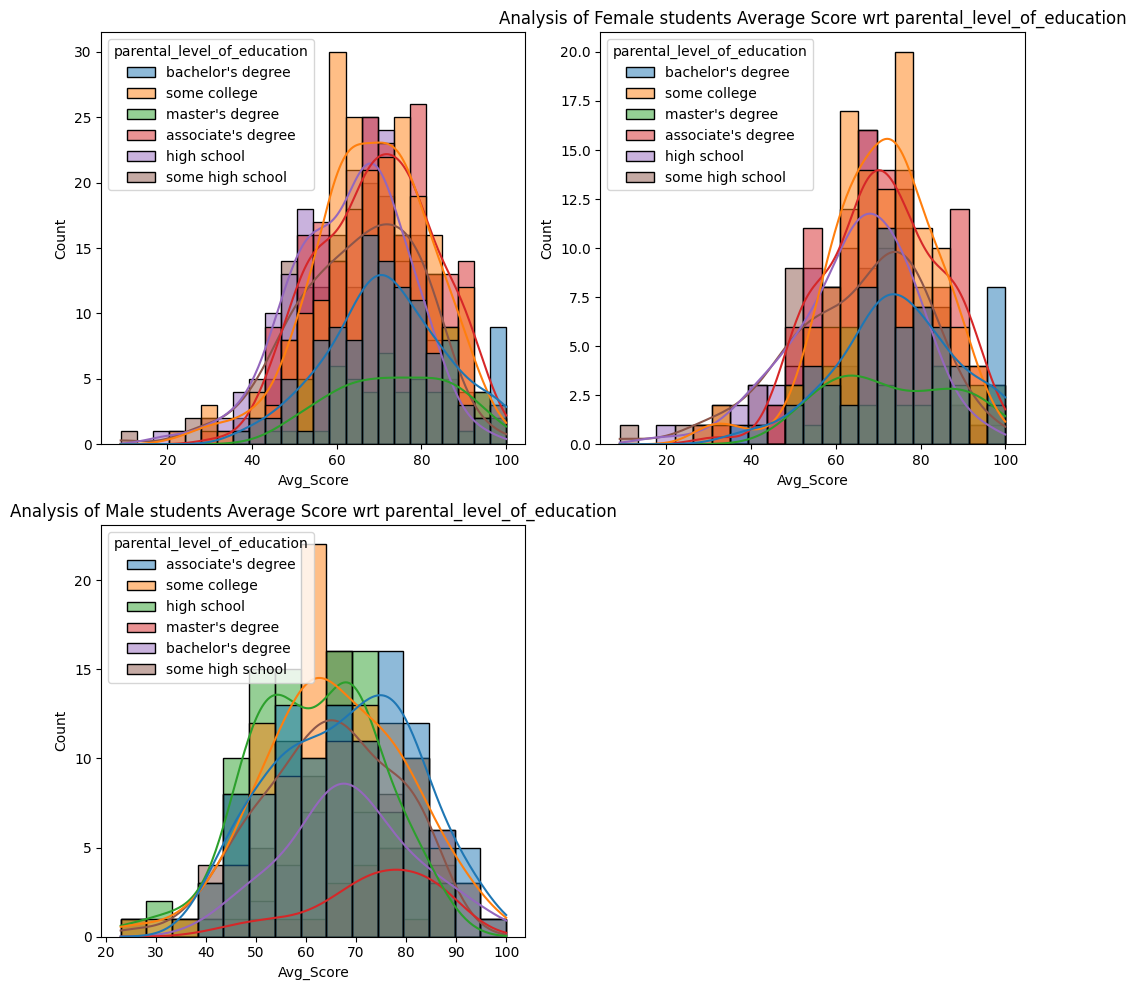

In [42]:
# average with respect parental level education & gender

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x='Avg_Score',data=data,kde=True,color='r',hue='parental_level_of_education')
#plt.title('Analysis of Average Score wrt parental_level_of_education')
plt.subplot(2,2,2)
sns.histplot(x='Avg_Score',data=data[data['gender']=='female'],kde=True,hue='parental_level_of_education')
plt.title('Analysis of Female students Average Score wrt parental_level_of_education')
plt.subplot(2,2,3)
sns.histplot(x='Avg_Score',data=data[data['gender']=='male'],kde=True,hue='parental_level_of_education')
plt.title('Analysis of Male students Average Score wrt parental_level_of_education')
plt.tight_layout()

Note:
    
    1. There is no impact of parental education on female students performance(Avg score is same range, no impact)
    
    2. male students whose parents have associates degree and masters dgree are tend to perform well

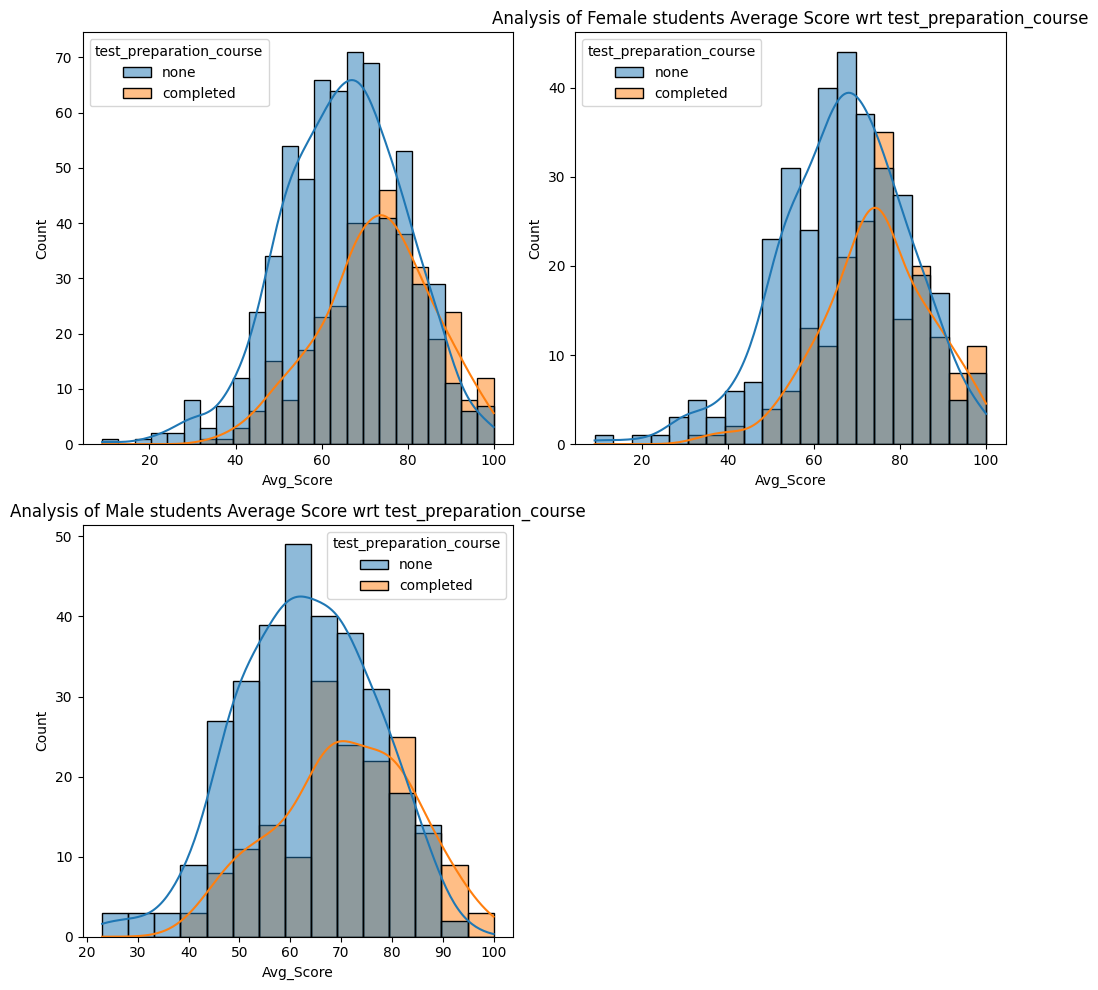

In [43]:
# average with respect to test_preparation_course

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x='Avg_Score',data=data,kde=True,color='r',hue='test_preparation_course')
#plt.title('Analysis of Average Score wrt test_preparation_course')
plt.subplot(2,2,2)
sns.histplot(x='Avg_Score',data=data[data['gender']=='female'],kde=True,hue='test_preparation_course')
plt.title('Analysis of Female students Average Score wrt test_preparation_course')
plt.subplot(2,2,3)
sns.histplot(x='Avg_Score',data=data[data['gender']=='male'],kde=True,hue='test_preparation_course')
plt.title('Analysis of Male students Average Score wrt test_preparation_course')
plt.tight_layout()

Note:
    
    1. generally test preparation course is have an good impact on student performance
    
    2. Male students who have completed the test preparation course performed well  

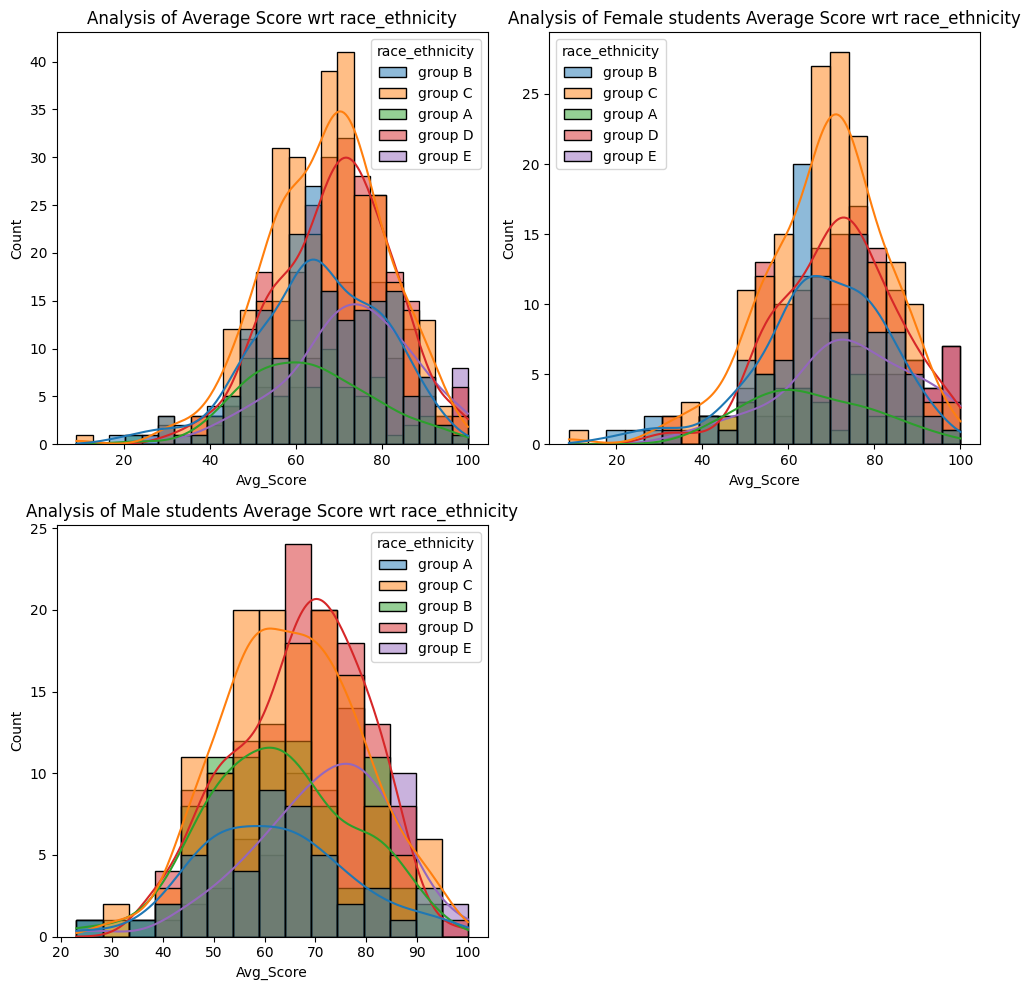

In [44]:
# average with respect to race_ethnicity

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x='Avg_Score',data=data,kde=True,color='r',hue='race_ethnicity')
plt.title('Analysis of Average Score wrt race_ethnicity')
plt.subplot(2,2,2)
sns.histplot(x='Avg_Score',data=data[data['gender']=='female'],kde=True,hue='race_ethnicity')
plt.title('Analysis of Female students Average Score wrt race_ethnicity')
plt.subplot(2,2,3)
sns.histplot(x='Avg_Score',data=data[data['gender']=='male'],kde=True,hue='race_ethnicity')
plt.title('Analysis of Male students Average Score wrt race_ethnicity')
plt.tight_layout()

Note:
    
    1. group A & group B perform poorly in exam irrespective of gender

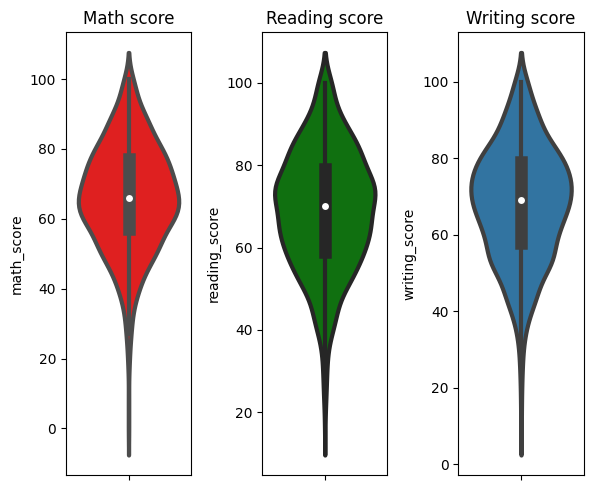

In [45]:
# maximum score of students in all three categories- using violin plot

plt.figure(figsize=(8,5))
plt.subplot(1,4,1)
sns.violinplot(y='math_score',data=data,kde=True,color='r',linewidth=3)
plt.title("Math score")
plt.subplot(1,4,2)
sns.violinplot(y='reading_score',data=data,kde=True,color='g',linewidth=3)
plt.title("Reading score")
plt.subplot(1,4,3)
sns.violinplot(y='writing_score',data=data,kde=True,linewidth=3)
plt.title("Writing score")
plt.tight_layout()

Note:

most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

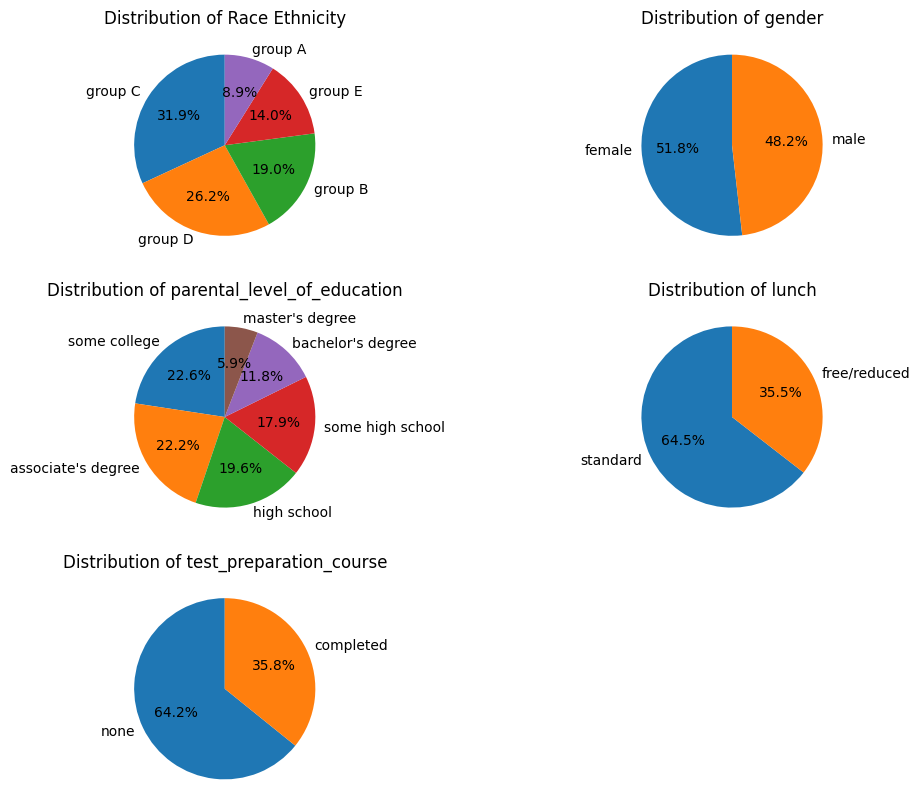

In [46]:
# Multi variate analysis using pie plot

plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
size=data['race_ethnicity'].value_counts().values
labels=data['race_ethnicity'].value_counts().index
plt.title('Distribution of Race Ethnicity')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)

plt.subplot(3,2,2)
size=data['gender'].value_counts().values
labels=data['gender'].value_counts().index
plt.title('Distribution of gender')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)


plt.subplot(3,2,3)
size=data['parental_level_of_education'].value_counts().values
labels=data['parental_level_of_education'].value_counts().index
plt.title('Distribution of parental_level_of_education')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)

plt.subplot(3,2,4)
size=data['lunch'].value_counts().values
labels=data['lunch'].value_counts().index
plt.title('Distribution of lunch')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)

plt.subplot(3,2,5)
size=data['test_preparation_course'].value_counts().values
labels=data['test_preparation_course'].value_counts().index
plt.title('Distribution of test_preparation_course')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)

plt.show()

Note:
    
    1. No. of students is more in group C
    
    2. No. of male & female students are almost equal
    
    3. more than 50% parents are having collage degrees
    
    4. 64.5% total students are having standard lunch
    
    5. Only 35.8% of students are complted the test preparation course

#### Gender column analysis

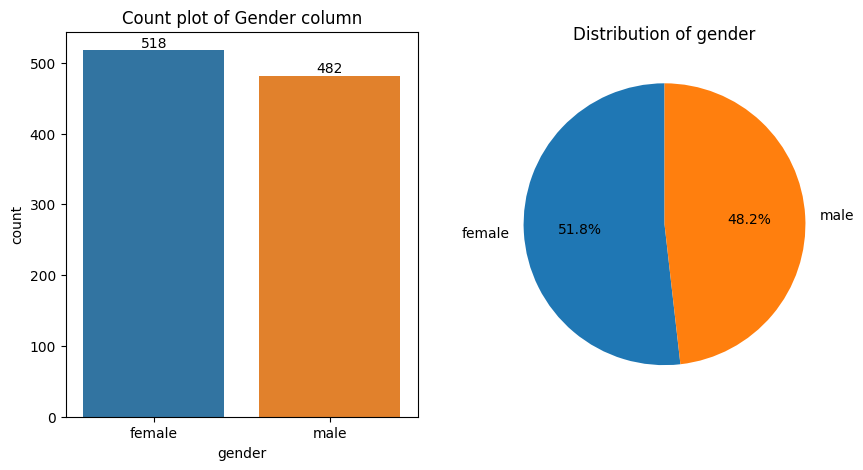

In [47]:
# univariate analysis of Gender column

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='gender', data=data)
ax.bar_label(ax.containers[0])
plt.title("Count plot of Gender column")

plt.subplot(1,2,2)
size=data['gender'].value_counts().values
labels=data['gender'].value_counts().index
plt.title('Distribution of gender')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)

plt.show()

Note: There are almost equal no of male (51.8%) & female students (48.2%)

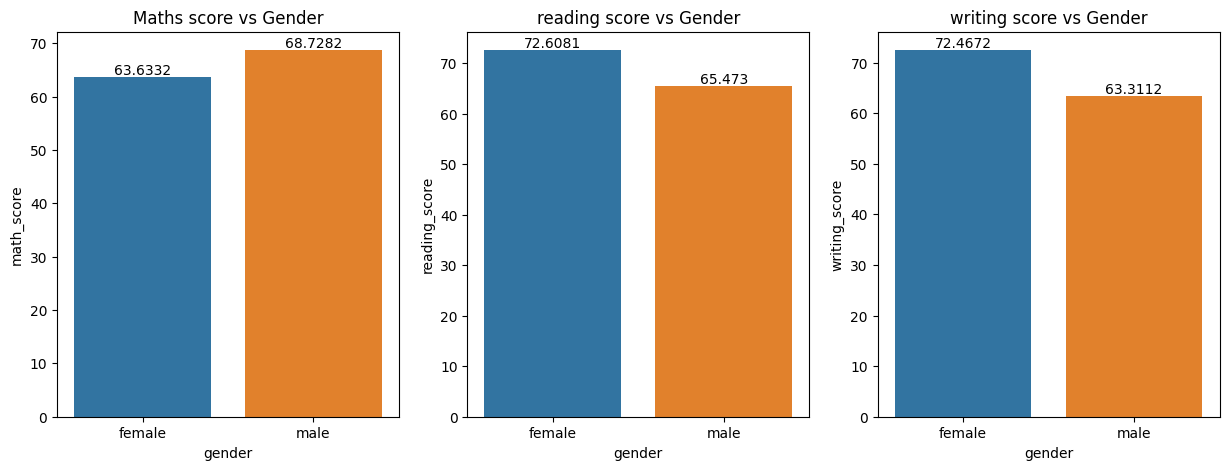

In [48]:
# bivariate Anlysis of Gender Column
# effect of gender in students performance

df=data.groupby('gender')[['math_score','reading_score','writing_score']].mean()
df=pd.DataFrame(df).reset_index()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax=sns.barplot(x=df['gender'],y=df['math_score'])
ax.bar_label(ax.containers[0])
plt.title('Maths score vs Gender')

plt.subplot(1,3,2)
ax=sns.barplot(x=df['gender'],y=df['reading_score'])
ax.bar_label(ax.containers[0])
plt.title('reading score vs Gender')


plt.subplot(1,3,3)
ax=sns.barplot(x=df['gender'],y=df['writing_score'])
ax.bar_label(ax.containers[0])
plt.title('writing score vs Gender')

plt.show()

Note:
    
    1. male students performed better in maths compared to female students
    
    2. female students were leading in writing & reading

#### Race_ethnicity column analysis

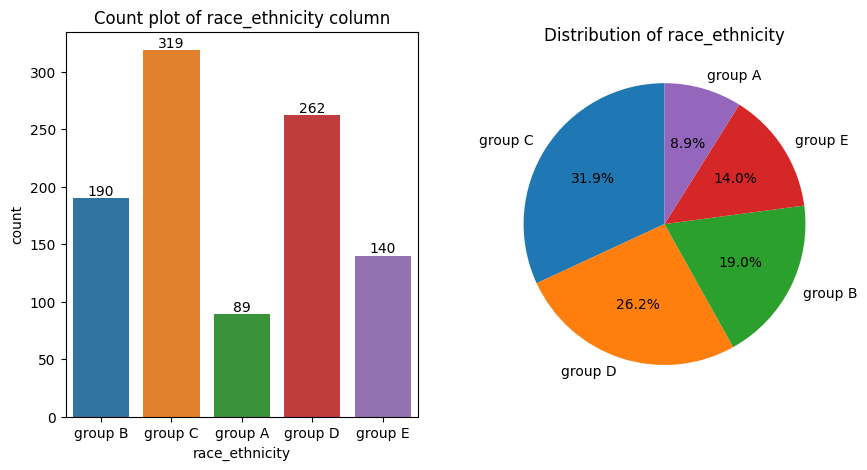

In [49]:
# univariate analysis of race_ethnicity column

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='race_ethnicity', data=data)
ax.bar_label(ax.containers[0])
plt.title("Count plot of race_ethnicity column")

plt.subplot(1,2,2)
size=data['race_ethnicity'].value_counts().values
labels=data['race_ethnicity'].value_counts().index
plt.title('Distribution of race_ethnicity')
plt.pie(size,labels=labels,autopct='%1.1f%%', startangle=90)

plt.show()

Note: 
    
    1. 31.9% students are from group C
    
    2. Only a small percentage around 8.9% students are from group A

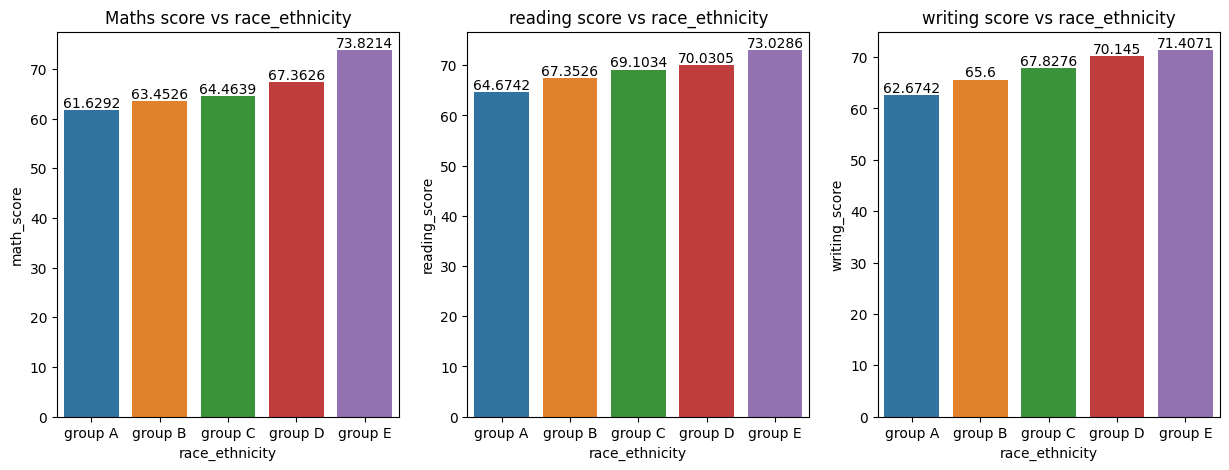

In [50]:
# bivariate Anlysis of race_ethnicity Column
# effect of race_ethnicity in students performance

df=data.groupby('race_ethnicity')[['math_score','reading_score','writing_score']].mean()
df=pd.DataFrame(df).reset_index()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax=sns.barplot(x=df['race_ethnicity'],y=df['math_score'])
ax.bar_label(ax.containers[0])
plt.title('Maths score vs race_ethnicity')

plt.subplot(1,3,2)
ax=sns.barplot(x=df['race_ethnicity'],y=df['reading_score'])
ax.bar_label(ax.containers[0])
plt.title('reading score vs race_ethnicity')


plt.subplot(1,3,3)
ax=sns.barplot(x=df['race_ethnicity'],y=df['writing_score'])
ax.bar_label(ax.containers[0])
plt.title('writing score vs race_ethnicity')

plt.show()

Note:
    
    1. students from group E performed better in all category
    
    2. Group E students perform better in Maths than reading & writing 
    
    3. group A students got lower marks in all 3 categories

#### Parental_level_of_education column analysis

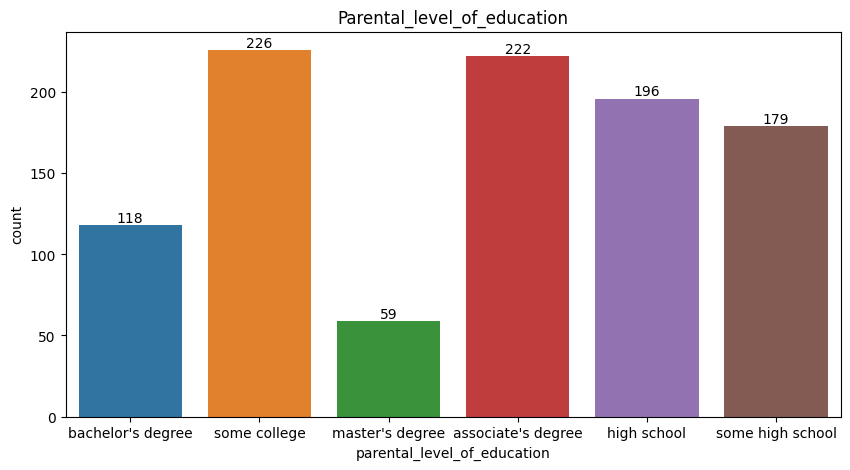

In [51]:
#univariate analysis of Parental_level_of_education column

plt.figure(figsize=(10,5))
ax = sns.countplot(x='parental_level_of_education', data=data)
ax.bar_label(ax.containers[0])
plt.title("Parental_level_of_education")
plt.show()

Note:
    
    1. Most of the parents were having some college or associate degree
    
    2. Only 59 parents were having masters degree

<Figure size 1000x500 with 0 Axes>

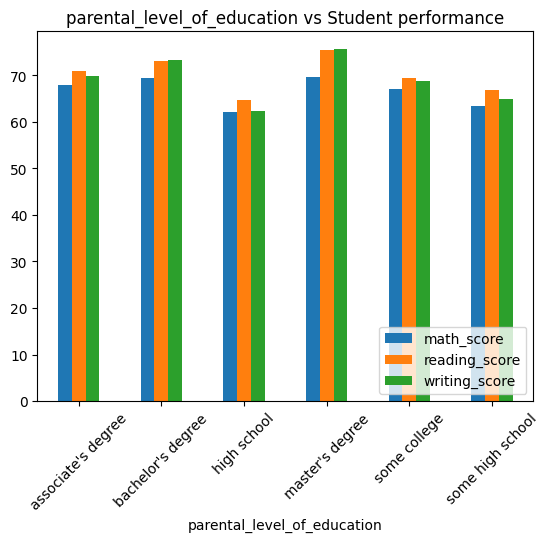

In [53]:
plt.figure(figsize=(10,5))
data.groupby('parental_level_of_education')[['math_score','reading_score','writing_score']].agg('mean').plot(kind='bar')
plt.legend(loc ="lower right")
plt.title('parental_level_of_education vs Student performance')
plt.xticks(rotation=45)
plt.show()

Note: 
    students whose parents having masters or bachelor degree performed well in exam

#### Lunch column analysis

<Figure size 1000x500 with 0 Axes>

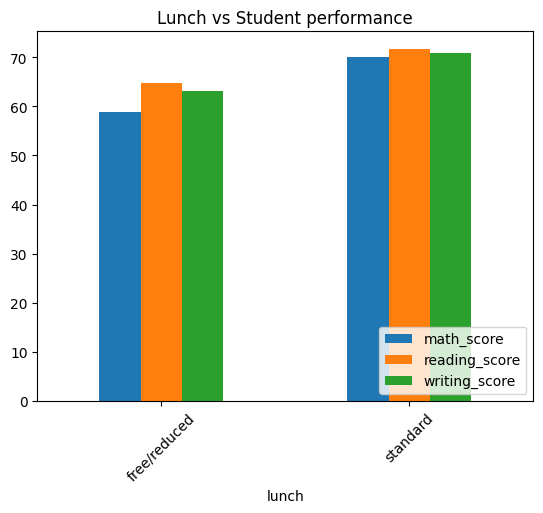

In [54]:
plt.figure(figsize=(10,5))
data.groupby('lunch')[['math_score','reading_score','writing_score']].agg('mean').plot(kind='bar')
plt.legend(loc ="lower right")
plt.title('Lunch vs Student performance')
plt.xticks(rotation=45)
plt.show()

Note:
    
    Those students having standard lunch performed better in studies

<Figure size 800x300 with 0 Axes>

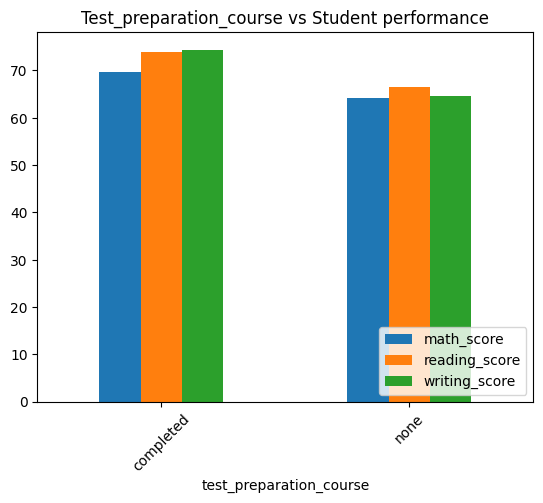

In [56]:
# Impact of Test preparation courses

plt.figure(figsize=(8,3))
data.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].agg('mean').plot(kind='bar')
plt.legend(loc ="lower right")
plt.title('Test_preparation_course vs Student performance')
plt.xticks(rotation=45)
plt.show()

Note: 
    
    There is no high impact of test course on student performance.

#### Multivariate analysis using pairplot

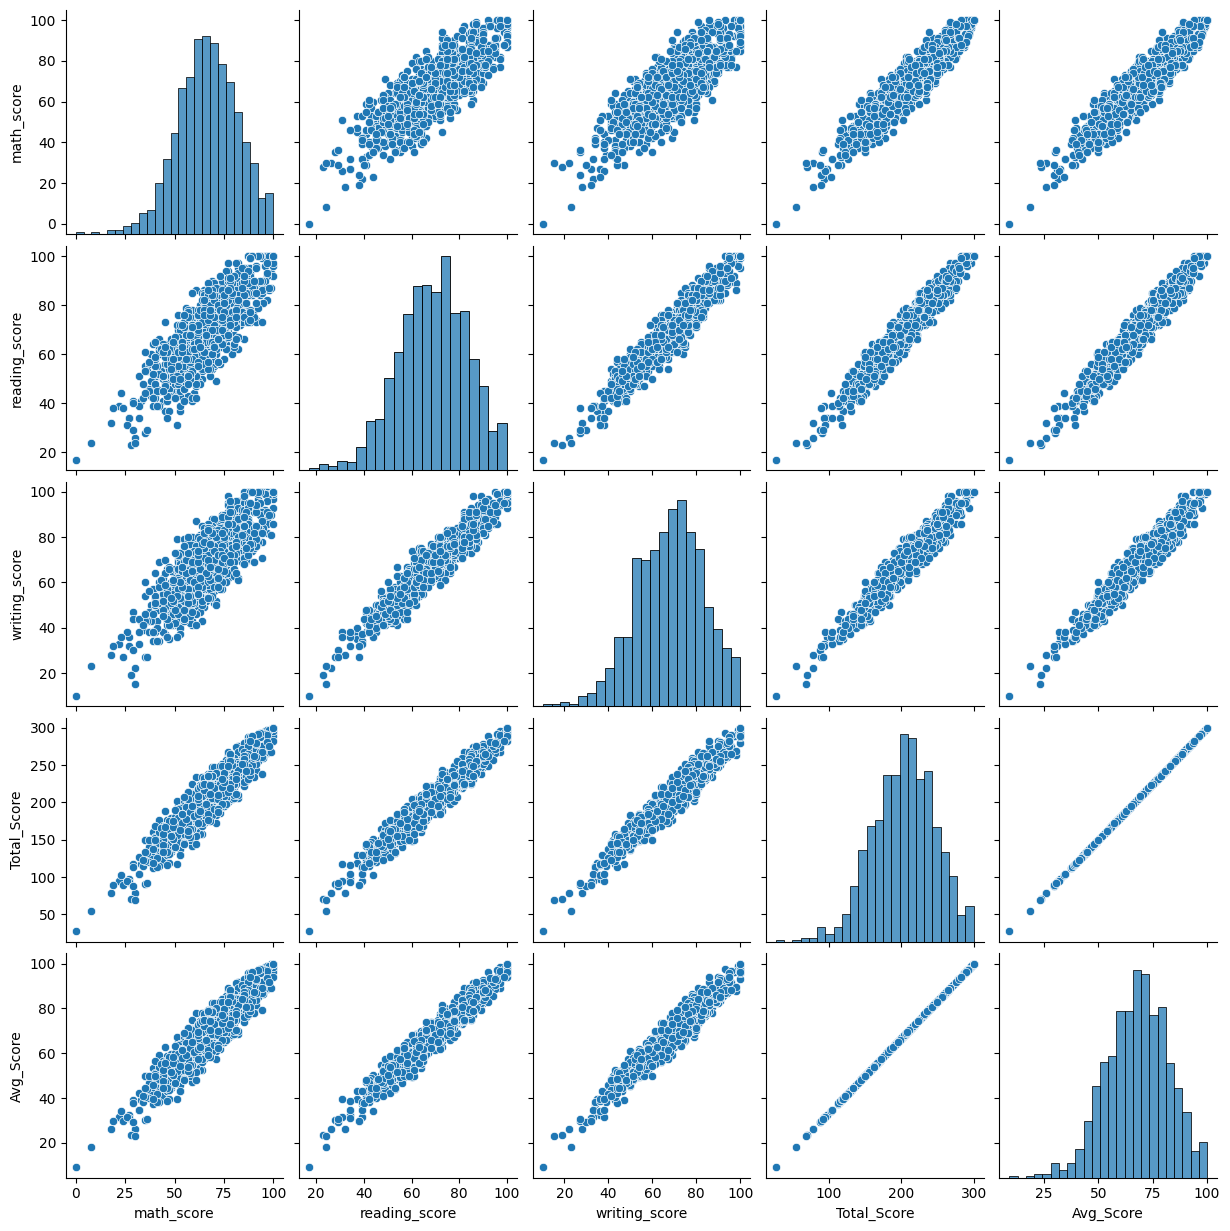

In [57]:
sns.pairplot(data)

Note:
    
    There is a linear relation between all numeric features

#### Visualise outliers using Boxplot

Text(0.5, 1.0, 'Presence of outliers')

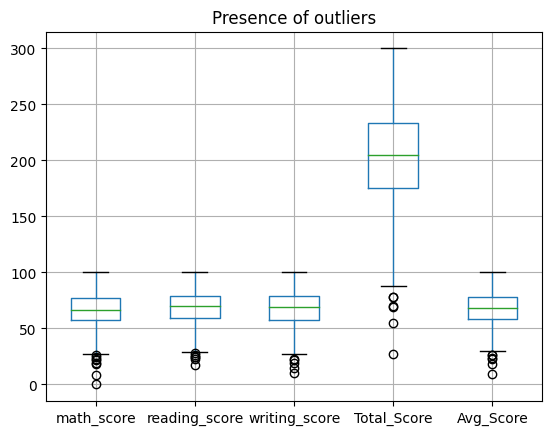

In [58]:
data.boxplot()
plt.title("Presence of outliers")

Note:
    
    There are data points falling beyond 25th percentile

# Conclusion

1. Factors like gender, race-ethnicity, parental education and lunch are effecting students performance

2. There is no high difference in score for those who took the test preparation course

3. All the numerical features are linearly correlated each other